https://github.com/MonteiroOscar98/Solar-System-Animation

In [ ]:
#!pip install skyfield
import numpy as np
import matplotlib.pyplot as plt
from skyfield.api import load
from matplotlib.animation import FuncAnimation
from matplotlib import rc

# Use HTML5 video output for animations
rc('animation', html='html5')

In [ ]:
# Load ephemerides
eph = load('de421.bsp')
sun = eph['sun']
ts  = load.timescale()

# Choose date
t = ts.utc(2025, 5, 5)

# Planet settings (no Moon)
planet_names = ['mercury', 'venus', 'earth', 'mars',
                'jupiter barycenter', 'saturn barycenter',
                'uranus barycenter', 'neptune barycenter']

planet_colors = ['#a9a9a9', '#deb887', '#1f77b4', '#d04f26',
                 '#e09f3e', '#f4e285', '#63c5da', '#22356f']

fixed_distances = {
    'mercury': 3, 'venus': 5, 'earth': 7, 'mars': 9,
    'jupiter barycenter': 13, 'saturn barycenter': 16,
    'uranus barycenter': 19, 'neptune barycenter': 22
}

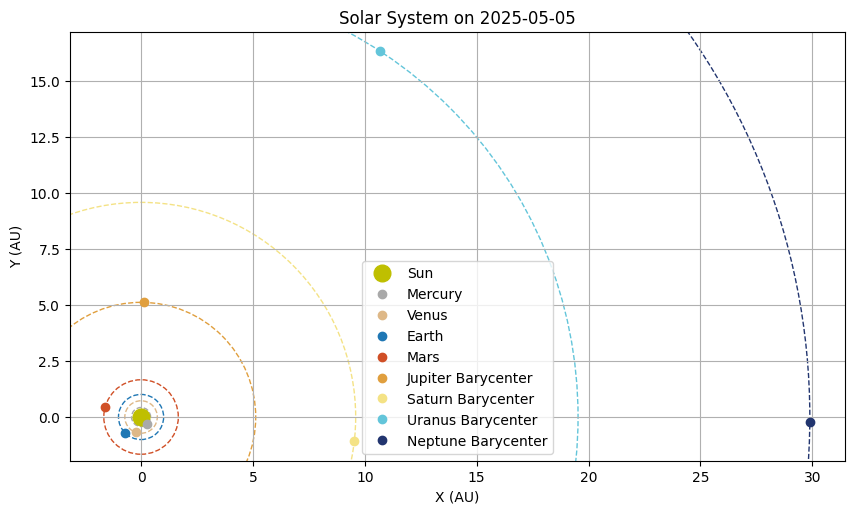

In [ ]:
# Prepare figure
plt.figure(figsize=(10,10))
plt.gca().set_aspect('equal', 'box')
plt.title('Solar System on 2025‑05‑05')
plt.xlabel('X (AU)')
plt.ylabel('Y (AU)')
plt.grid(True)
plt.plot(0, 0, 'yo', markersize=12, label='Sun')

# Plot each planet
for name, color in zip(planet_names, planet_colors):
    body = eph[name]  # Use barycenter names
    ast  = sun.at(t).observe(body)              # heliocentric astrometric
    ecl  = ast.ecliptic_latlon()                # lat, lon, distance in AU
    lat, lon, r = ecl                         # Unpack the tuple (lat, lon, r)

    # Convert the Distance object to float by accessing .au
    r_au = r.au  # Now r_au is a float (distance in AU)

    # Cartesian in ecliptic plane (x, y) using longitude and distance
    x = r_au * np.cos(lon.radians)
    y = r_au * np.sin(lon.radians)

    # Plot planet
    plt.plot(x, y, 'o', color=color, label=name.title())

    # Add its orbit as a dashed circle
    circle = plt.Circle((0, 0), r_au, edgecolor=color,
                        fill=False, linestyle='--', linewidth=1)
    plt.gca().add_artist(circle)

plt.legend()
plt.show()

In [ ]:
# Time range for n days
start_time = ts.utc(2024, 1, 1)
days = [start_time + i for i in range(365)]

# Set up figure
fig, ax = plt.subplots(figsize=(8, 8), facecolor='black')
fig.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.05)  # Adjusted for title and footer space
ax.set_position([0, 0, 1, 1])  # Full axes space
ax.set_facecolor('black')
ax.set_aspect('equal', 'box')
ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)

# Orbit rings
for name, color in zip(planet_names, planet_colors):
    circle = plt.Circle((0, 0), fixed_distances[name], edgecolor=color,
                        facecolor='none', linestyle='--', linewidth=1.2, alpha=0.6)
    ax.add_artist(circle)

# Sun
ax.plot(0, 0, 'yo', markersize=20)
ax.add_artist(plt.Circle((0, 0), 2, color='yellow', alpha=0.2))

# Stars
for _ in range(150):
    sx = np.random.uniform(-25, 25)
    sy = np.random.uniform(-25, 25)
    ax.plot(sx, sy, 'w.', markersize=1, alpha=0.3)

# Planet markers and labels
planet_dots = []
planet_labels = []
for color in planet_colors:
    dot, = ax.plot([], [], 'o', color=color, markersize=10)
    planet_dots.append(dot)
    label = ax.text(0, 0, '', fontsize=9, color='white', ha='center')
    planet_labels.append(label)

# Display the starting date and the range of days before the animation starts (outside the plot)
starting_date_text = f"Starting Date: {start_time.utc_iso().split('T')[0]}"
end_date_text = f"Ending Date: {days[-1].utc_iso().split('T')[0]}"
range_of_days_text = f"Duration: {len(days)} days"

# Adding the start and range text outside the plot (aligned to the left)
plt.figtext(0.05, 0.98, starting_date_text, ha='left', va='top', fontsize=10, color='white', transform=fig.transFigure)
plt.figtext(0.05, 0.94, end_date_text, ha='left', va='top', fontsize=10, color='white', transform=fig.transFigure)
plt.figtext(0.05, 0.90, range_of_days_text, ha='left', va='top', fontsize=10, color='white', transform=fig.transFigure)


# Update function
def update(frame):
    t = days[frame]
    for i, name in enumerate(planet_names):
        body = eph[name]
        ast = sun.at(t).observe(body)
        ecl = ast.ecliptic_latlon()
        lat, lon, _ = ecl

        r = fixed_distances[name]
        x = r * np.cos(lon.radians)
        y = r * np.sin(lon.radians)

        planet_dots[i].set_data([x], [y])
        planet_labels[i].set_position((x, y + 0.7))
        planet_labels[i].set_text(name.split()[0].capitalize())

    return planet_dots + planet_labels

# Create animation
anim = FuncAnimation(fig, update, frames=len(days), interval=35, blit=True)

# Clean up static plot output
plt.close()

# Display as HTML5 video
anim
